<a href="https://colab.research.google.com/github/jbwenjoy/000545000/blob/main/CIS_545_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project - Spring 2025**
## Group Member:
Yiyan Liang: edgarl@seas.upenn.edu
<br>Bowen Jiang: jbwenjoy@seas.upenn.edu
<br>Binglong Bao: binglong@seas.upenn.edu

# **1. Introduction and Background**

# **1.1 Probelm Statement**
Airfare pricing in the U.S. domestic airline industry has long been a topic of interest due to its dynamic and opaque nature. From 1993 to 2024, the industry has undergone substantial changes including fluctuating fuel prices, shifting market competition, and evolving consumer behavior. These factors make it difficult for travelers to anticipate ticket prices and for airlines to optimize revenue through effective pricing strategies.

Despite the abundance of large-scale data, there remains a lack of comprehensive, data-driven analyses that systematically explore the relationship between these variables and airfare trends. One of our team members is planning to book a flight during a holiday period and is particularly interested in understanding what drives changes in ticket prices. This curiosity sparked our interest and motivated us to investigate whether historical data could reveal meaningful patterns that help consumers make more informed travel decisions.

# **1.2 Objective and Value Proposition**
The objective of this project is to conduct a thorough exploratory data analysis (EDA) of U.S. domestic airline fares from 1993 to 2024, and to develop predictive models that capture how different variables affect airfare pricing. The project integrates route and fare data with external economic indicators such as oil prices to uncover insights into airfare dynamics.

The primary goals are:

- **Understand Key Drivers of Pricing:** Investigate how factors like route distance, seasonality, fuel costs, airline competition, and passenger volume affect airfares.

- **Support Strategic Planning:** Provide insights to airline operators and policymakers for optimizing pricing strategies and understanding long-term market shifts.

- **Build a Predictive Model:** Develop regression models capable of forecasting average fares given known market and economic conditions.

The value proposition of this project lies in offering a systematic and scalable framework for analyzing complex fare-setting behavior across three decades. For consumers, it may lead to better fare predictions and smarter booking decisions. For industry stakeholders, it provides tools for data-informed pricing and long-term planning.

# **2. Get to know data**

## **2.1 Load data**

In [46]:
import os
import pandas as pd

In [47]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [48]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [49]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [50]:
# Download flights dataset (DO NOT CHANGE)
!kaggle datasets download -d bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
!unzip /content/us-airline-flight-routes-and-fares-1993-2024

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
License(s): apache-2.0
us-airline-flight-routes-and-fares-1993-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/us-airline-flight-routes-and-fares-1993-2024.zip
replace US Airline Flight Routes and Fares 1993-2024.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [51]:
flights_data = 'US Airline Flight Routes and Fares 1993-2024.csv'
flights_df = pd.read_csv(flights_data, low_memory=False)


In [52]:
# # Download WTI dataset (DO NOT CHANGE)
url = "https://datahub.io/core/oil-prices/r/wti-daily.csv"
oil_df = pd.read_csv(url)
oil_df.to_csv("flat-ui__data-Fri Mar 28 2025.csv", index=False)
fuel_data = 'flat-ui__data-Fri Mar 28 2025.csv'


# **3. Exploratory Data Analysis (EDA)**

## 3.1 Data preprocessing

In [53]:
from scipy import stats

### 3.1.1 Flight Data

In [54]:
df_original = pd.read_csv(flights_data, low_memory=False)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [55]:
df_original.duplicated().sum()

np.int64(0)

In [56]:
df_original.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [57]:
df_original.sample(3)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
10124,Table 1a,2000,4,30977,34027,"Chicago, IL","West Palm Beach/Palm Beach, FL",13930,14027,ORD,...,226.33,AA,0.4000,221.27,UA,0.3700,219.16,"Chicago, IL\n(41.775002, -87.696388)","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",200041393014027ORDPBI
238574,Table1a,2023,2,30647,30466,"Cleveland, OH (Metropolitan Area)","Phoenix, AZ",10874,14107,CAK,...,433.45,AA,0.5727,421.73,AA,0.5727,421.73,NaN,NaN,202321087414107CAKPHX
22861,Table 1a,2003,3,31703,33195,"New York City, NY (Metropolitan Area)","Tampa, FL (Metropolitan Area)",12197,15304,HPN,...,184.43,US,0.4700,194.12,DL,0.2800,177.97,"New York City, NY (Metropolitan Area)\n(40.123...","Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",200331219715304HPNTPA


In [58]:
print(df_original.shape)

df_clean = df_original.copy()
df_clean = df_clean.dropna()
df_clean = df_clean.dropna(axis=1)
df_clean = df_clean.drop_duplicates()

print(df_clean.shape)

(245955, 23)
(205189, 23)


In [59]:
# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df_clean.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df_clean[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(df_outliers.shape)

# Remove rows with outliers based on Z-score
df_clean = df_clean[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
print(df_clean.shape)
df_clean.sample(3)

(9513, 23)
(195676, 23)


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
116794,Table 1a,1998,2,32600,32457,"Little Rock, AR","San Francisco, CA (Metropolitan Area)",12992,14771,LIT,...,187.95,DL,0.2900,205.68,NW,0.1200,170.26,"Little Rock, AR\n(34.748745, -92.275105)","San Francisco, CA (Metropolitan Area)\n(37.780...",199821299214771LITSFO
208968,Table 1a,2018,2,31453,30466,"Houston, TX","Phoenix, AZ",12191,14107,HOU,...,219.55,WN,0.9918,218.40,WN,0.9918,218.40,"Houston, TX\n(29.760803, -95.369506)","Phoenix, AZ\n(30.406931, -87.217578)",201821219114107HOUPHX
157765,Table 1a,1996,2,33198,33495,"Kansas City, MO","New Orleans, LA",13198,13495,MCI,...,132.37,WN,0.2400,116.27,WN,0.2400,116.27,"Kansas City, MO\n(39.099792, -94.578559)","New Orleans, LA\n(29.950621, -90.074948)",199621319813495MCIMSY


### 3.1.2 Fuel Price Data

In [60]:
fuel_df_original = pd.read_csv(fuel_data, low_memory=False)
fuel_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9891 entries, 0 to 9890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9891 non-null   object 
 1   Price   9891 non-null   float64
dtypes: float64(1), object(1)
memory usage: 154.7+ KB


In [61]:
fuel_df_original.duplicated().sum()

np.int64(0)

In [62]:
fuel_df_original.head()

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [63]:
fuel_df_original.sample(3)

,Date,Price
133,1986-07-14,11.23
446,1987-10-08,19.77
1544,1992-01-20,18.92


In [64]:
print(fuel_df_original.shape)

fuel_df_clean = fuel_df_original.copy()
fuel_df_clean = fuel_df_clean.dropna()
fuel_df_clean = fuel_df_clean.dropna(axis=1)
fuel_df_clean = fuel_df_clean.drop_duplicates()

print(fuel_df_clean.shape)

(9891, 2)
(9891, 2)


Since the fuel price data is very clean, we don't need further cleaning.

## 3.2 EDA

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [66]:
df = df_clean.copy()
fuel_df = fuel_df_clean.copy()

### 3.2.1 Distribution of Fair, distance and fuel price

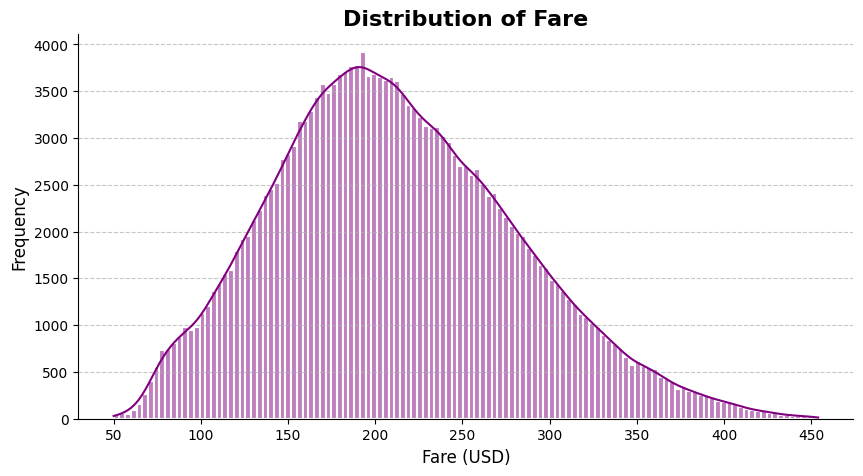

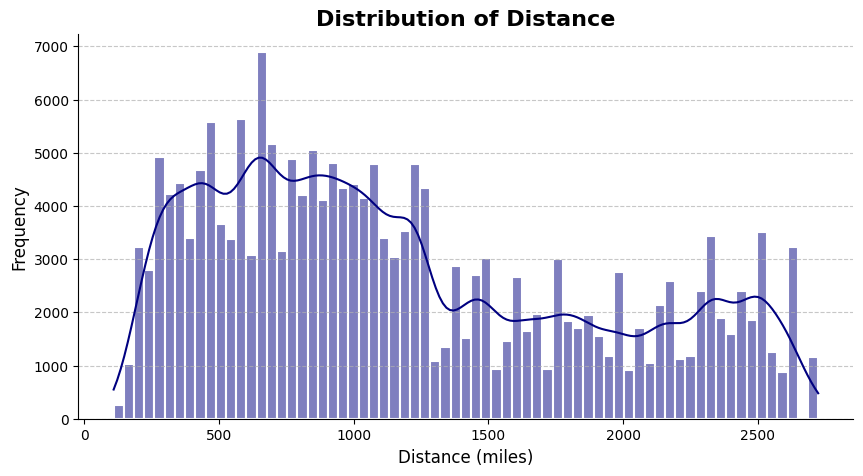

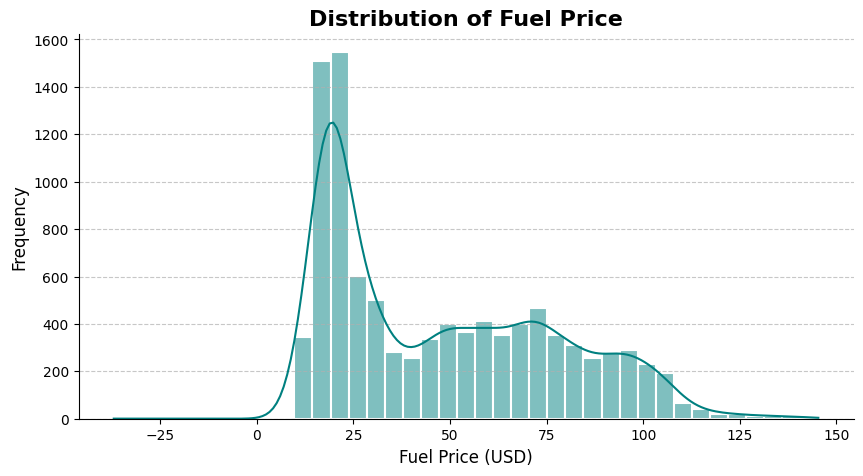

In [67]:
# Distribution of fare
plt.figure(figsize=(10, 5))
sns.histplot(df['fare'], kde=True, color='#800080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fare', fontsize=16, fontweight='bold')
plt.xlabel('Fare (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

# Distribution of distance
plt.figure(figsize=(10, 5))
sns.histplot(df['nsmiles'], kde=True, color='#000080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Distance', fontsize=16, fontweight='bold')
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Distribution of fuel price
plt.figure(figsize=(10, 5))
sns.histplot(fuel_df['Price'], kde=True, color='#008080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fuel Price', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

### 3.2.2 Relation between Fair Price and Distance

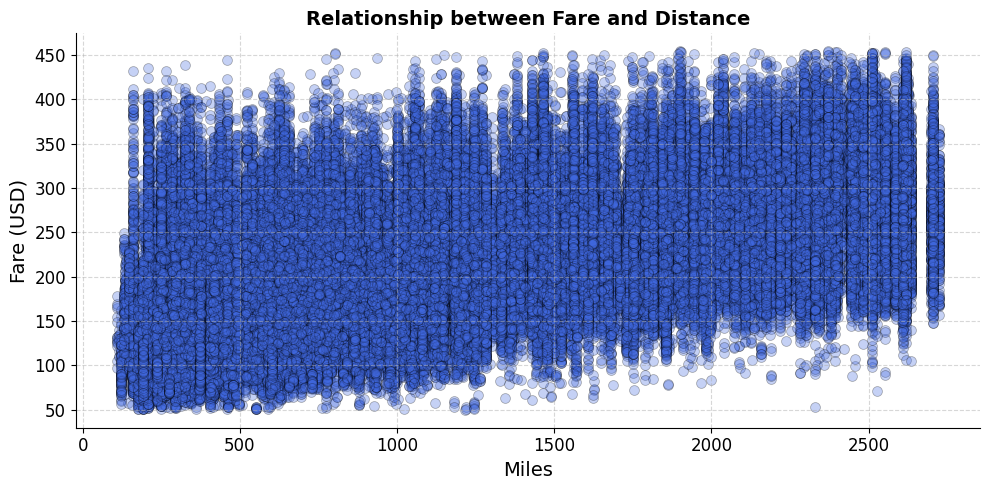

In [68]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='nsmiles', y='fare', data=df, alpha=0.3, color='royalblue', edgecolor='k', s=50)
plt.title('Relationship between Fare and Distance', fontsize=14, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Fare (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

### 3.2.3 Flight Fair and Fuel Price over Time

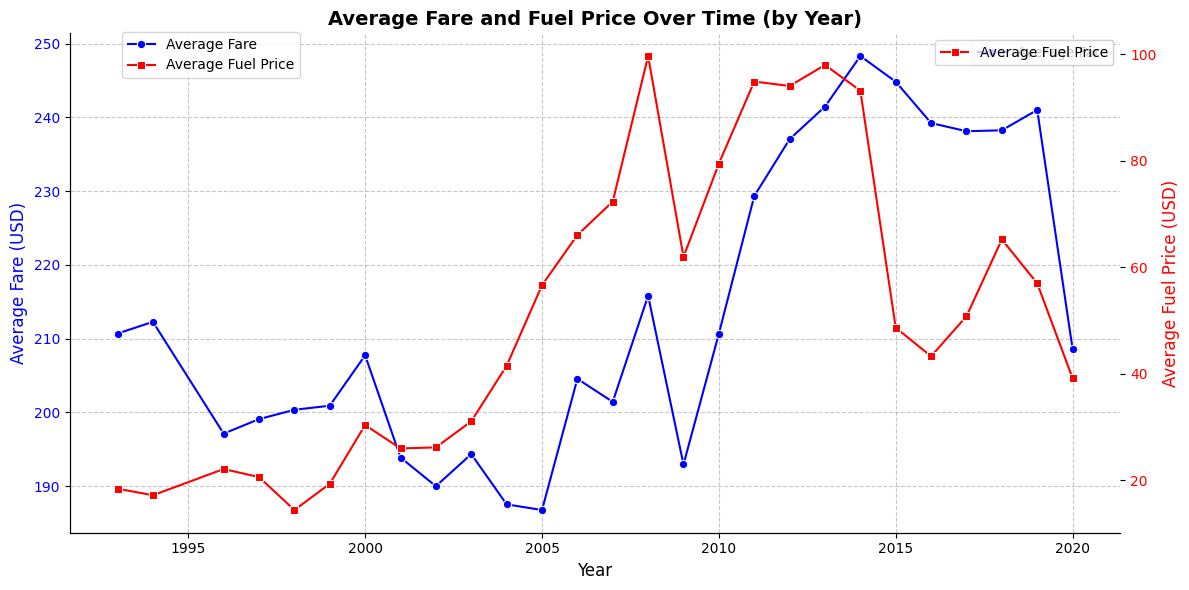

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df and fuel_df are already loaded and cleaned

# Convert 'Date' column to datetime objects
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])

# Extract year from 'Date' column
fuel_df['Year'] = fuel_df['Date'].dt.year

avg_fuel_price_per_year = fuel_df.groupby('Year')['Price'].mean().reset_index()
avg_fare_per_year = df.groupby('Year')['fare'].mean().reset_index()

# Find common years between fare and fuel data
common_years = list(set(avg_fare_per_year['Year']) & set(avg_fuel_price_per_year['Year']))

# Filter data for common years
avg_fare_per_year = avg_fare_per_year[avg_fare_per_year['Year'].isin(common_years)]
avg_fuel_price_per_year = avg_fuel_price_per_year[avg_fuel_price_per_year['Year'].isin(common_years)]

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average fare on the first y-axis (ax1)
sns.lineplot(x='Year', y='fare', data=avg_fare_per_year, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis (ax2) sharing the same x-axis
ax2 = ax1.twinx()

# Plot average fuel price on the second y-axis (ax2)
sns.lineplot(x='Year', y='Price', data=avg_fuel_price_per_year, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add solid line to the right spine of ax2
ax2.spines['right'].set_visible(True)  # Make the right spine visible
ax2.spines['right'].set_color('red')    # Set the color of the right spine

# Set title and legend
plt.title('Average Fare and Fuel Price Over Time (by Year)', fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))

# Improve aesthetics
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

We can see some correlation between flight ticket fair and fuel price, but averging by year is somewhat rough. Below we also plot base on quarterly average, and we can see that the fluctuations of the two are more obvious.

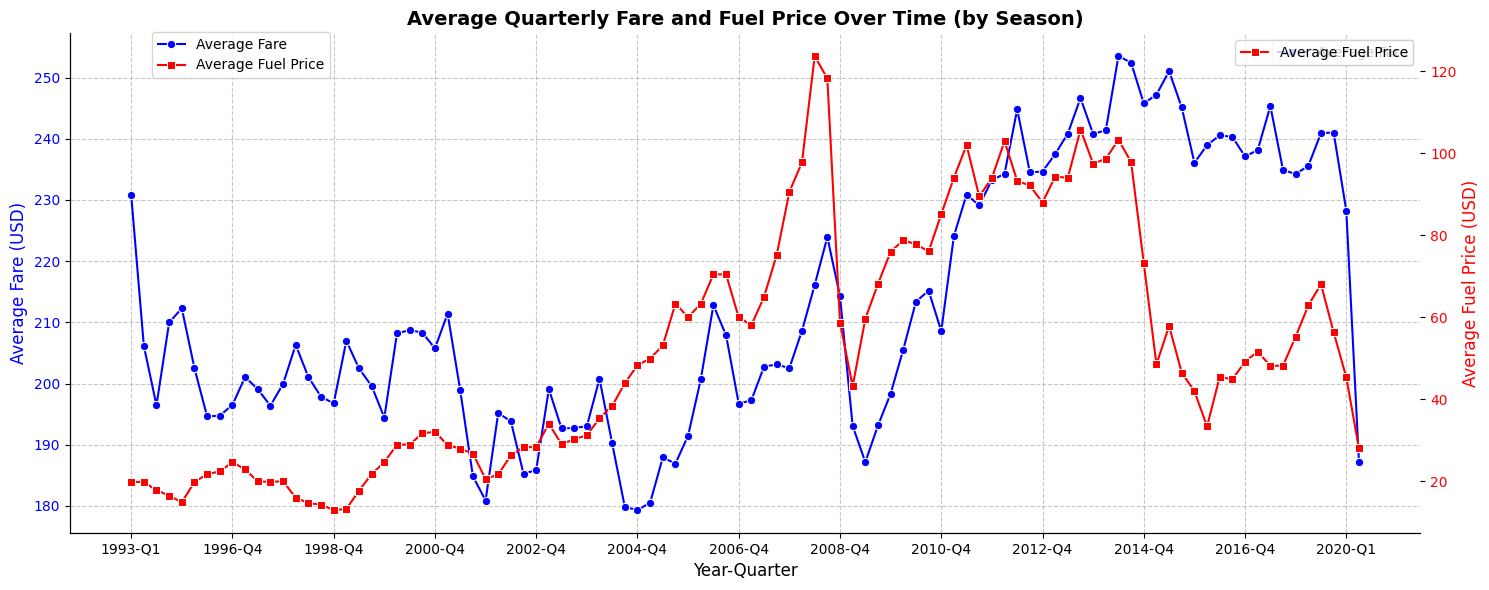

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df and fuel_df are already loaded and cleaned

# Prepare fuel data:
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df['Quarter'] = fuel_df['Date'].dt.quarter
avg_fuel_price_per_quarter = fuel_df.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

# Prepare flight data:
avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merge and filter data for common quarters:
merged_df = pd.merge(avg_fare_per_quarter, avg_fuel_price_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))  # Adjust figure size for better readability

# Avr flight fare (ax1)
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year-Quarter', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='Price', data=merged_df, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add solid line to the right spine of ax2
ax2.spines['right'].set_visible(True)  # Make the right spine visible
ax2.spines['right'].set_color('red')    # Set the color of the right spine

plt.title('Average Quarterly Fare and Fuel Price Over Time (by Season)', fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))

# Adjust x-axis ticks for better readability
plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15)) # Maximum num of x labels

# Improve aesthetics
sns.despine()
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# **4. Modeling**

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin, BaseEstimator

In [72]:
df = df_clean.copy()
df['quaters'] = df['quarter'].astype(int) + (df['Year'].astype(int) - 2000) * 4
new_df = df[['fare', 'nsmiles', 'quaters']].dropna()

X = new_df[['nsmiles', 'quaters']]
y = new_df['fare']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [74]:
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression()),
])

pipe.fit(X_train, y_train)
print(f"R^2 socre: {pipe.score(X_test, y_test)}")
print(f"MSE socre: {mean_squared_error(y_test, pipe.predict(X_test))}")
print(f"model intercept: {pipe.named_steps['model'].intercept_}")
print(f"model coefficients: {pipe.named_steps['model'].coef_}")

def plot_prediction(model,X_test, y_test):
    y_test_pred = model.predict(X_test)
    # use plotly to plot y_train_pred and y_test_pred vs y_train and y_test
    fig = go.Figure()
    # control figure size
    fig.update_layout(width=800, height=800)
    fig.add_trace(go.Scatter(x=y_test, y=y_test_pred, mode='markers', name='test'))
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    fig.update_xaxes(range=[min_val - 50, max_val + 50])
    fig.update_yaxes(range=[min_val - 50, max_val + 50])
    # add title and axis labels
    fig.update_layout(title='Prediction vs Actual',
                    xaxis_title='Actual',
                    yaxis_title='Prediction')
    fig.add_trace(go.Scatter(
                    x=[min_val, max_val],
                    y=[min_val, max_val],
                    mode='lines',
                    name='Ideal (y = x)',
                    line=dict(color='red', dash='dash')
    ))
    fig.show()
    return



# sample some points from X_test and y_test
X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
# plot the prediction
plot_prediction(pipe, X_test_sample, y_test_sample)



R^2 socre: 0.30598937368672985
MSE socre: 3328.0376524465564
model intercept: 132.99723359076805
model coefficients: [135.42843055  47.25294866]


As we can see, the baseline linear regression model has a very low R-squared value. This means that the model is not a good fit for the data.
We would like to further improve the performance by :
1. Adding more features, such as dealing with the categorical features and using the one-hot encoding technique.
2. Using more advanced machine learning algorithms, such as **kernel regression** and **gradient boosting trees**. These algorithms are designed to handle complex relationships between the features and the target variable. For example, kernel regression uses a kernel function to map the input features to a higher-dimensional space, while gradient boosting trees use a series of decision trees to build a strong predictive model. These algorithms can capture more complex relationships between the features and the target variable, which can lead to better performance than linear regression does.
3. Tuning the hyperparameters of the machine learning algorithms to improve their performance.

# **5. Project Management**

# **6. Hypothesis Testing**